# **INVENTORY MANAGEMENT**

# Data Ingestion

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving smart_logistics_dataset.csv to smart_logistics_dataset.csv


In [ ]:
# Import Necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [ ]:
# load the dataset
df = pd.read_csv("smart_logistics_dataset.csv")
# Make plots look clean
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
# print the head
df.head()

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,NaN,60.1,285,1
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,NaN,99.2,260,0
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,NaN,71.6,270,1


In [ ]:
df.shape

(1000, 16)

In [ ]:
#Convert timestamp to a datetime object
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
# Get Missing values
df.isnull().sum()
df.dropna()

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,2024-09-28 09:08:23,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,2024-11-09 00:48:26,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,2024-02-02 22:28:16,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2024-10-14 10:21:17,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,2024-06-13 00:29:04,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,2024-07-22 16:30:00,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,2024-04-30 04:58:58,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


In [ ]:
# Drop any duplicates()
df = df.drop_duplicates()

In [ ]:
#Statisitics
df[['Inventory_Level', 'Demand_Forecast','Asset_Utilization']].describe()

,Inventory_Level,Demand_Forecast,Asset_Utilization
count,1000.000000,1000.000000,1000.000000
mean,297.915000,199.284000,79.599100
std,113.554773,59.920847,11.631153
min,100.000000,100.000000,60.000000
25%,201.000000,144.000000,69.475000
50%,299.000000,202.000000,79.250000
75%,399.000000,251.250000,89.425000
max,500.000000,300.000000,100.000000


In [ ]:
#Stockout: Inventory less than 20% of forecast demand
df['Stockout_Flag'] = (df['Inventory_Level'] < 0.2*df['Demand_Forecast']).astype(int)

In [ ]:
# OverStock: Inventory more than 150% of forecast
df['Overstock_Flag'] = (df['Inventory_Level'] > 1.5 * df['Demand_Forecast']).astype(int)

In [ ]:
# Rolling out Volatility (7-day window)
df['Inventory_Volatility'] = df['Inventory_Level'].rolling(window=7, min_periods=1).std()

In [ ]:
# Convert Traffic Status to Numeric data
traffic_type = {'Heavy': 1, 'Detour' :2, 'Clear' : 3}
df['Traffic_Status'] = df['Traffic_Status'].map(traffic_type).fillna(0)

In [ ]:
# Utilization Pressure Score (0-1 scaled sum of traffic, waiting, utilization)
df['Utilization_Pressure'] = (
    df[['Traffic_Status', 'Waiting_Time', 'Asset_Utilization']].sum(axis=1)
)
df['Utilization_Pressure'] = (
    (df['Utilization_Pressure'] - df['Utilization_Pressure'].min()) /
    (df['Utilization_Pressure'].max() - df['Utilization_Pressure'].min() + 1e-5)
)

In [ ]:
# Aggregate data by day
df_daily = df.groupby(df['Timestamp'].dt.date).agg({
    'Inventory_Level': 'mean',
    'Demand_Forecast' : 'mean',
    'Stockout_Flag' : 'sum',
    'Overstock_Flag' : 'sum'
}).reset_index()
df_daily.rename(columns={'Timestamp':'Date'}, inplace=True)

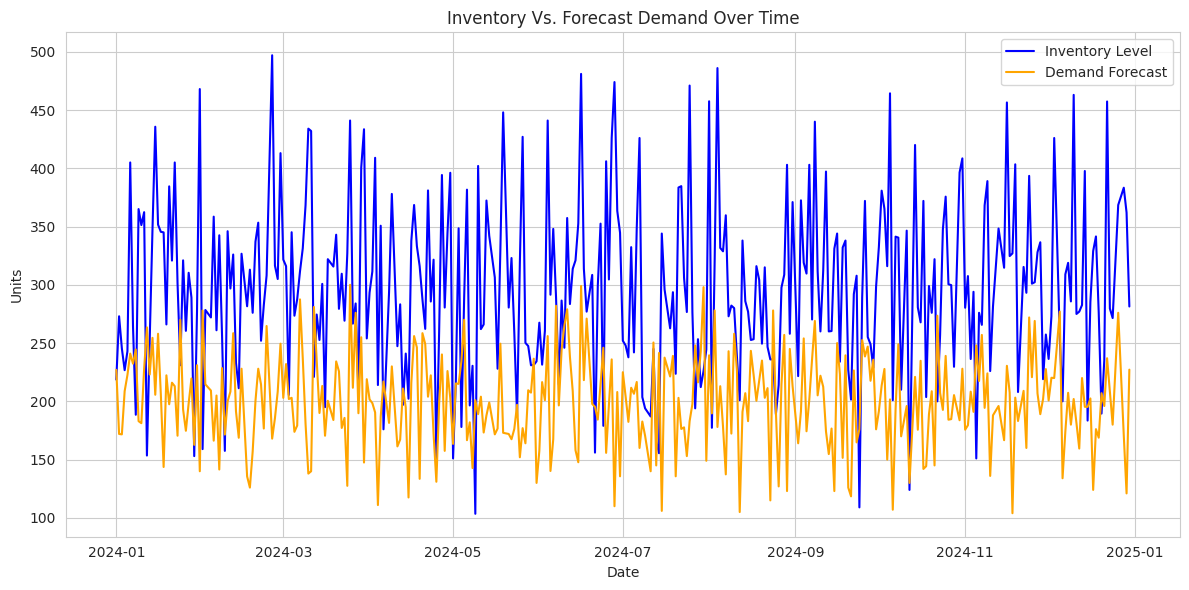

In [ ]:
# Inventory Vs Forecast over Time
plt.figure()
plt.plot(df_daily['Date'], df_daily['Inventory_Level'],label='Inventory Level',color='blue')
plt.plot(df_daily['Date'], df_daily['Demand_Forecast'], label = 'Demand Forecast', color='orange')
plt.title("Inventory Vs. Forecast Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Units")
plt.legend()
plt.tight_layout()
plt.show()

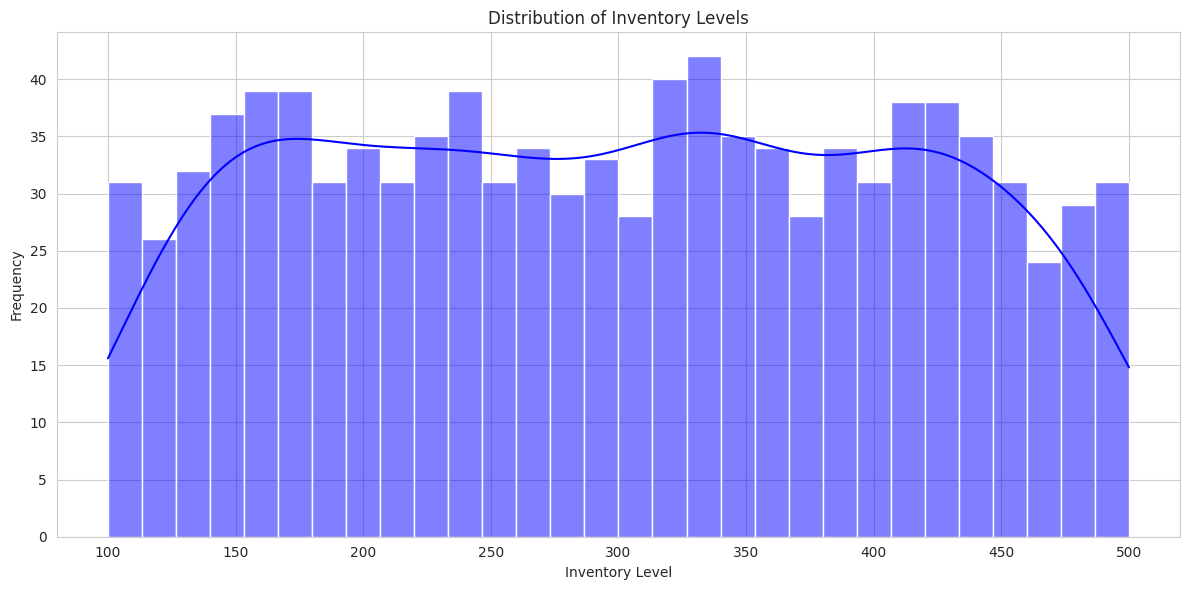

In [ ]:
# Histogram of Inventory Levels
plt.figure()
sns.histplot(df['Inventory_Level'], bins=30, color='blue', kde=True)
plt.title("Distribution of Inventory Levels")
plt.xlabel("Inventory Level")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

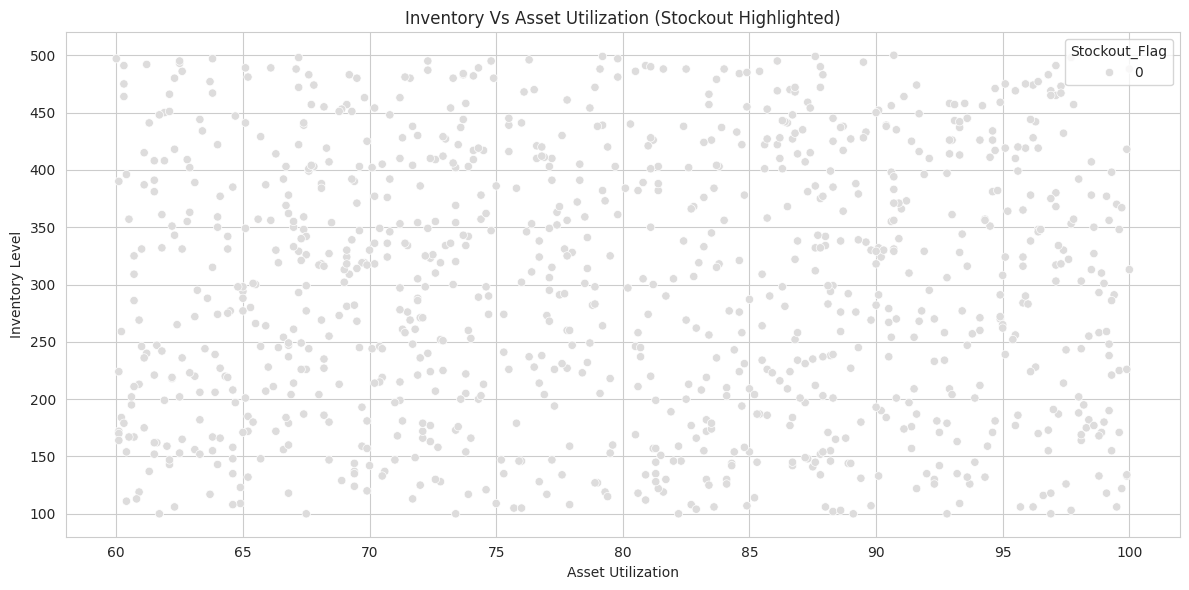

In [ ]:
# Inventory Vs Asset Utilization
plt.figure()
sns.scatterplot(x='Asset_Utilization', y='Inventory_Level', data=df, hue='Stockout_Flag',palette='coolwarm')
plt.title("Inventory Vs Asset Utilization (Stockout Highlighted)")
plt.xlabel("Asset Utilization")
plt.ylabel("Inventory Level")
plt.tight_layout()
plt.show()

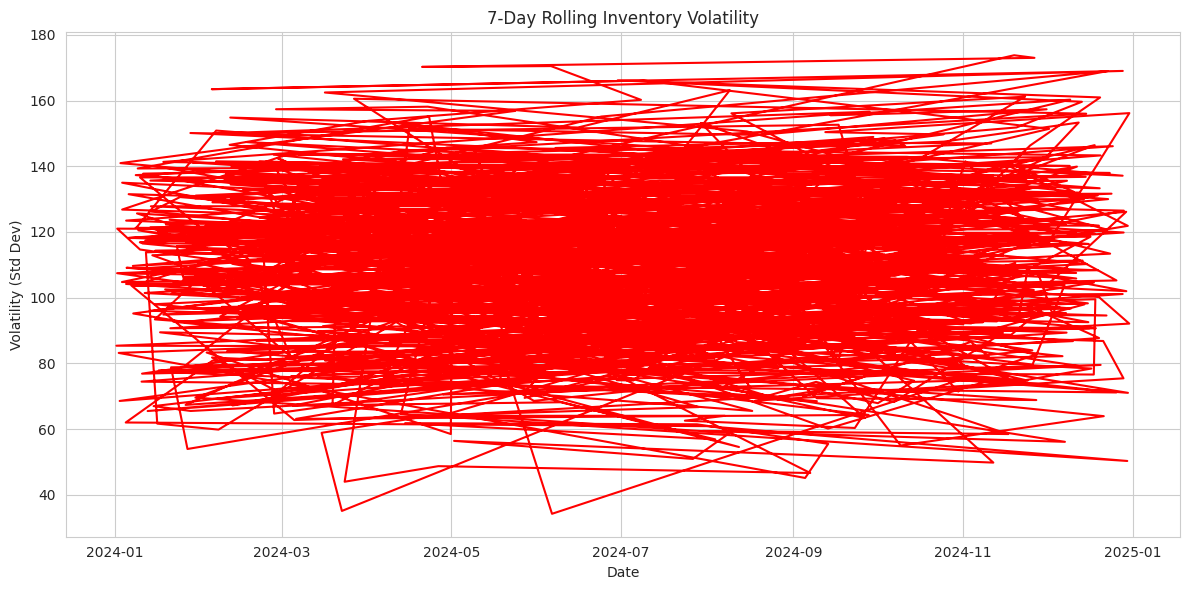

In [ ]:
# Votalitiy Over Time
plt.figure()
plt.plot(df['Timestamp'], df['Inventory_Volatility'], color='red')
plt.title("7-Day Rolling Inventory Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev)")
plt.tight_layout()
plt.show()

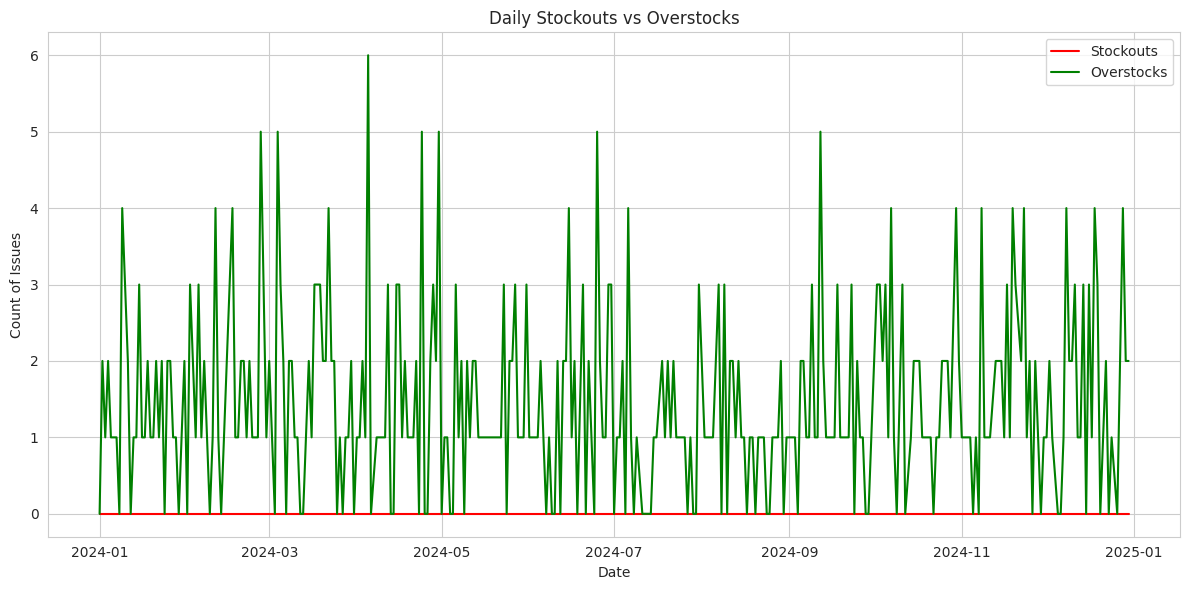

In [ ]:
plt.figure()
plt.plot(df_daily['Date'], df_daily['Stockout_Flag'], label='Stockouts', color='red')
plt.plot(df_daily['Date'], df_daily['Overstock_Flag'], label='Overstocks', color='green')
plt.title("Daily Stockouts vs Overstocks")
plt.xlabel("Date")
plt.ylabel("Count of Issues")
plt.legend()
plt.tight_layout()
plt.show()

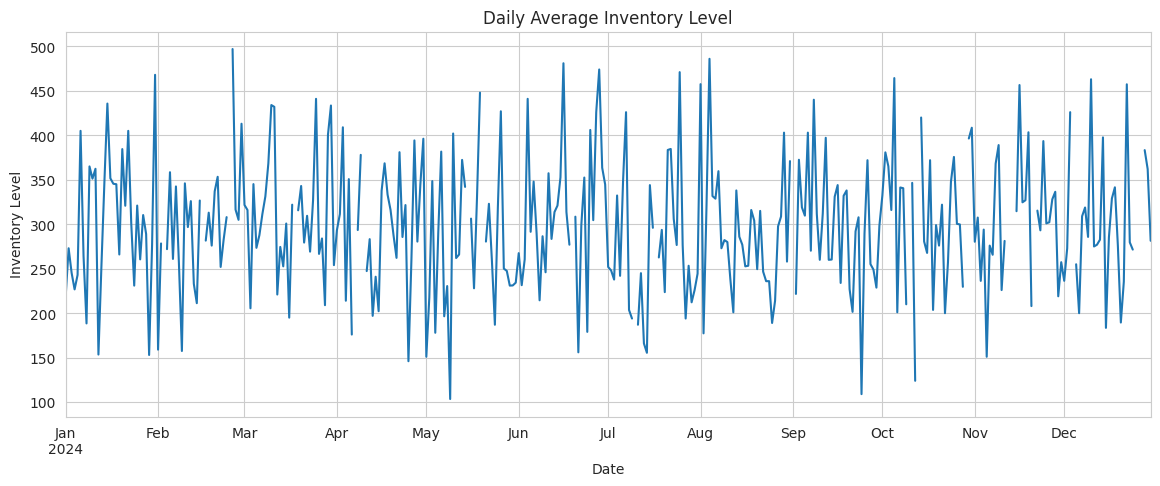

In [ ]:
# Inventory Over Time
plt.figure(figsize=(14,5))
df.set_index('Timestamp')['Inventory_Level'].resample('D').mean().plot()
plt.title("Daily Average Inventory Level")
plt.xlabel("Date")
plt.ylabel("Inventory Level")
plt.grid(True)
plt.show()

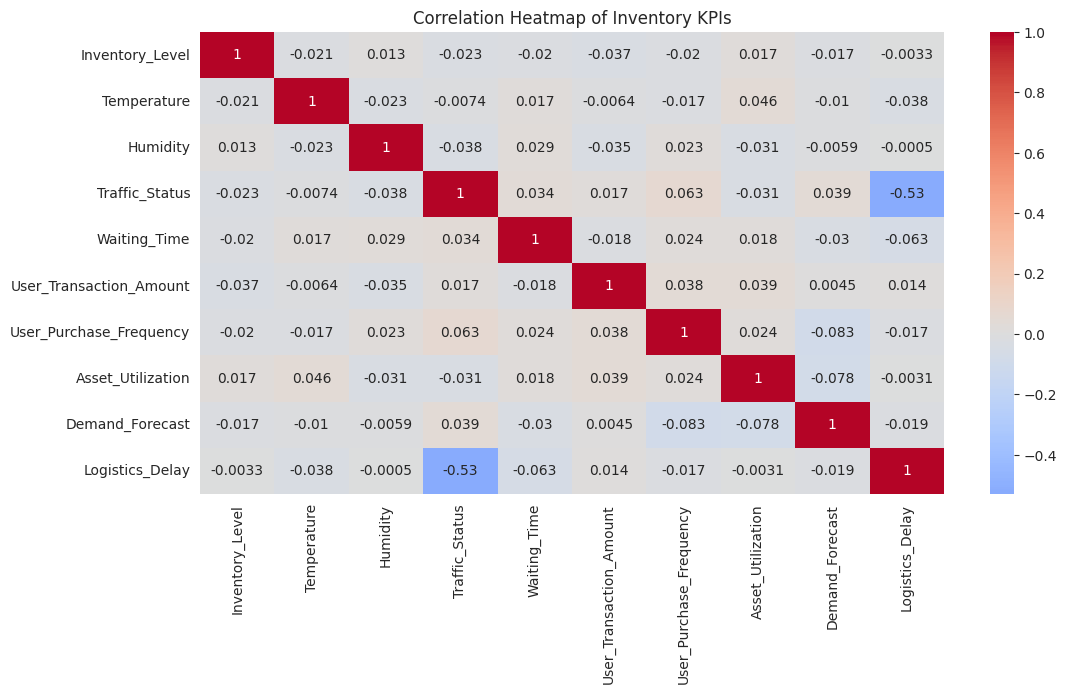

In [ ]:
# Top KPIs Correlation
kpi_columns = ['Inventory_Level', 'Temperature', 'Humidity','Traffic_Status',
               'Waiting_Time','User_Transaction_Amount','User_Purchase_Frequency',
               'Asset_Utilization', 'Demand_Forecast','Logistics_Delay']

plt.figure()
sns.heatmap(df[kpi_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Inventory KPIs")
plt.show()

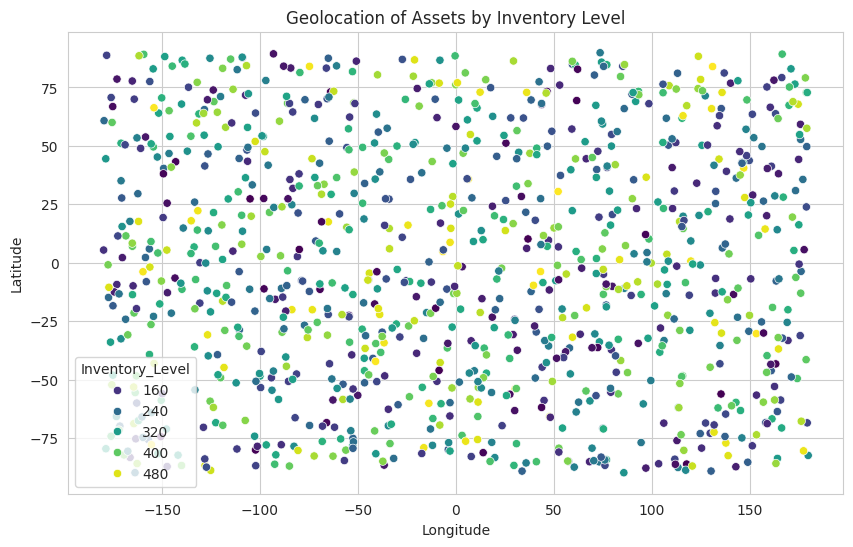

In [ ]:
# Geospatial Inventory Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Longitude',y='Latitude', hue='Inventory_Level',palette='viridis')
plt.title('Geolocation of Assets by Inventory Level')
#plt.colorbar(label='Inventory Level')
plt.show()

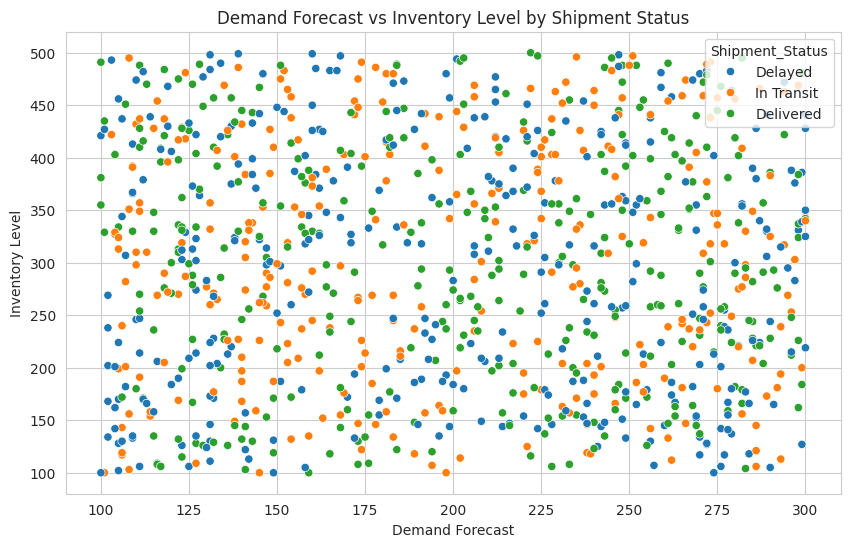

In [ ]:
# Demand Forecast vs Inventory Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Demand_Forecast', y='Inventory_Level',hue='Shipment_Status')
plt.title('Demand Forecast vs Inventory Level by Shipment Status')
plt.xlabel("Demand Forecast")
plt.ylabel("Inventory Level")
plt.grid(True)
plt.show()

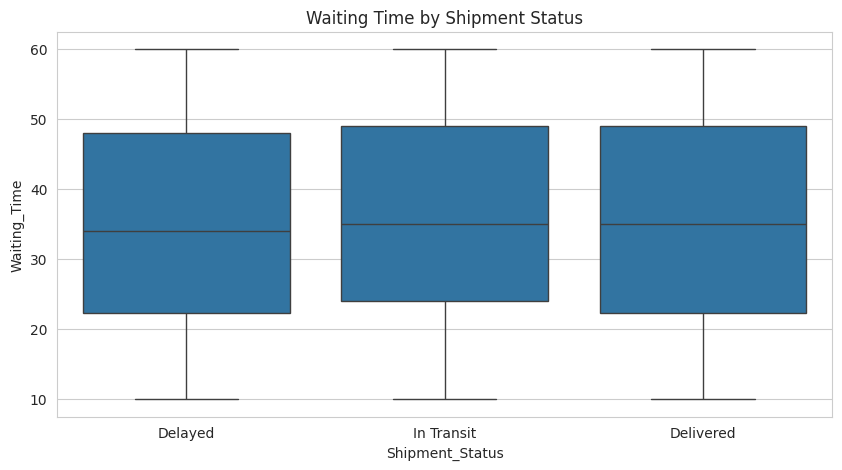

In [ ]:
# Impact of Waiting Time on Inventory
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Shipment_Status', y='Waiting_Time')
plt.title('Waiting Time by Shipment Status')
plt.show()

In [ ]:
# Average Inventory and Waiting Time by Delay Reason
delay_impact = df.groupby('Logistics_Delay_Reason').agg({
    'Inventory_Level': 'mean',
    'Waiting_Time': 'mean',
    'Asset_Utilization': 'mean',
    'Traffic_Status': 'mean',
}).sort_values(by='Inventory_Level', ascending=False)

print(delay_impact)

                        Inventory_Level  Waiting_Time  Asset_Utilization  \
Logistics_Delay_Reason                                                     
Weather                      305.621723     34.318352          79.646067   
Mechanical Failure           296.893162     35.918803          81.165385   
Traffic                      291.851695     35.898305          78.761864   

                        Traffic_Status  
Logistics_Delay_Reason                  
Weather                       2.059925  
Mechanical Failure            2.004274  
Traffic                       1.927966  


In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
import pingouin as pg

# Partial correlations to control multivariate noise
partial_corr = pg.pairwise_corr(df[[
    'Inventory_Level', 'Asset_Utilization', 'Waiting_Time', 'Traffic_Status',
    'Temperature', 'Humidity', 'User_Transaction_Amount', 'User_Purchase_Frequency'
]], method='pearson', covar='Temperature')

print(partial_corr[['X', 'Y', 'r', 'p-unc']])

                          X                        Y         r     p-unc
0           Inventory_Level        Asset_Utilization  0.018033  0.569158
1           Inventory_Level             Waiting_Time -0.019978  0.528226
2           Inventory_Level           Traffic_Status -0.023023  0.467298
3           Inventory_Level                 Humidity  0.012923  0.683290
4           Inventory_Level  User_Transaction_Amount -0.036928  0.243561
5           Inventory_Level  User_Purchase_Frequency -0.020070  0.526335
6         Asset_Utilization             Waiting_Time  0.017229  0.586498
7         Asset_Utilization           Traffic_Status -0.030205  0.340230
8         Asset_Utilization                 Humidity -0.029632  0.349468
9         Asset_Utilization  User_Transaction_Amount  0.038942  0.218783
10        Asset_Utilization  User_Purchase_Frequency  0.025264  0.425077
11             Waiting_Time           Traffic_Status  0.034285  0.278979
12             Waiting_Time                 Humidit

                mean         std  count
Asset_ID                               
Truck_8   322.862385  114.210695    109
Truck_10  313.104762  110.485287    105
Truck_5   309.311828  117.763394     93
Truck_6   297.262136  102.482132    103
Truck_2   294.400000  119.891024    105


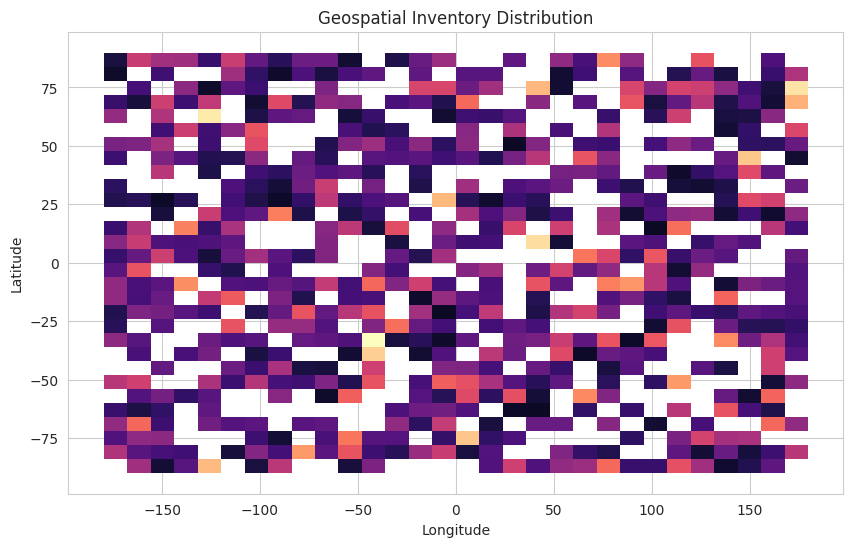

In [ ]:
# Segment Inventory by Asset_ID and Location
# Avg Inventory per Asset
asset_stats = df.groupby('Asset_ID')['Inventory_Level'].agg(['mean','std','count']).sort_values(by='mean',ascending=False)
print(asset_stats.head())

# Inventory heatmap by location grid
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Longitude', y='Latitude',weights='Inventory_Level',bins=30,cmap='magma')
plt.title("Geospatial Inventory Distribution")
plt.show()

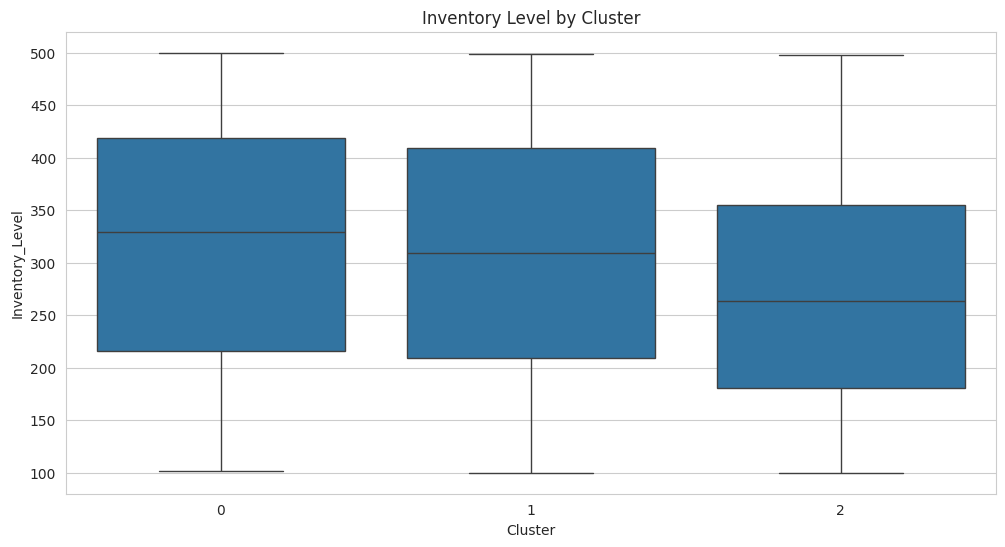

In [ ]:
# Cluster Inventory Behaviour by KPI patterns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_features = df[[
    'Inventory_Level', 'Asset_Utilization', 'Traffic_Status', 'Waiting_Time',
    'User_Transaction_Amount', 'User_Purchase_Frequency'
]].dropna()

# Normalize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Cluster distribution
sns.boxplot(x='Cluster', y='Inventory_Level', data=df)
plt.title("Inventory Level by Cluster")
plt.show()

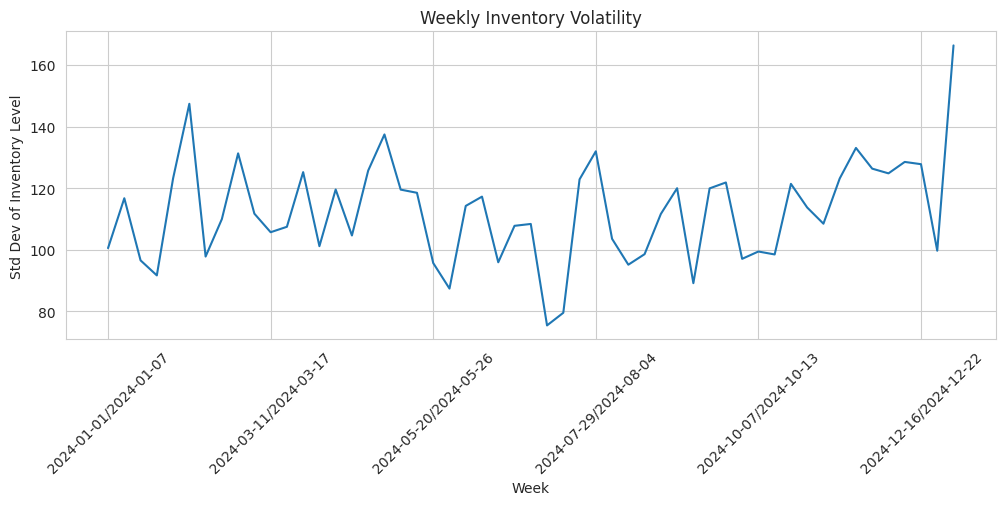

In [ ]:
# Time-Based Inventory Volatitility (Weekly)
df['Week'] = df['Timestamp'].dt.to_period('W').astype(str)

volatility = df.groupby('Week')['Inventory_Level'].std()
plt.figure(figsize=(12, 4))
volatility.plot()
plt.title("Weekly Inventory Volatility")
plt.ylabel("Std Dev of Inventory Level")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

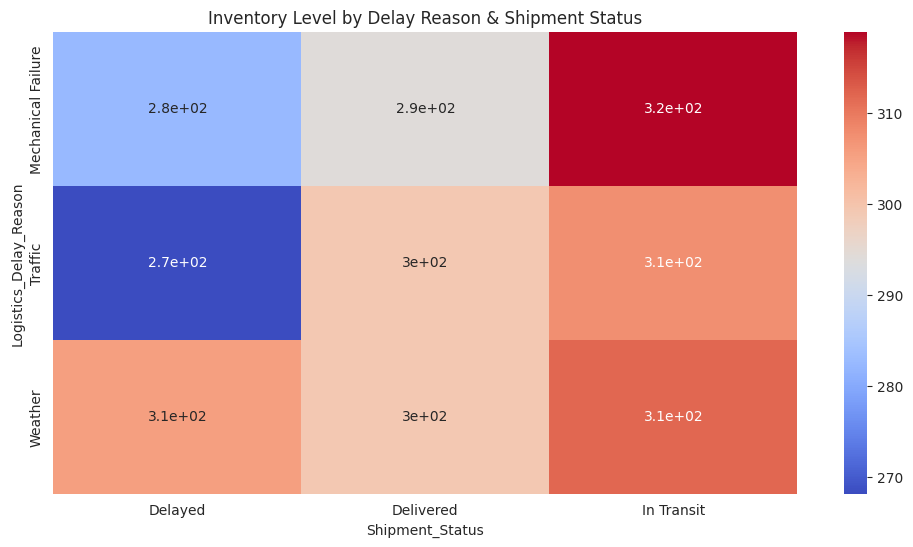

In [ ]:
# Impact of Delay Reasons on Inventory KPIs
delay_pivot = pd.pivot_table(df, values='Inventory_Level',index='Logistics_Delay_Reason',
                             columns='Shipment_Status', aggfunc='mean')

sns.heatmap(delay_pivot, annot=True, cmap='coolwarm')
plt.title('Inventory Level by Delay Reason & Shipment Status')
plt.show()

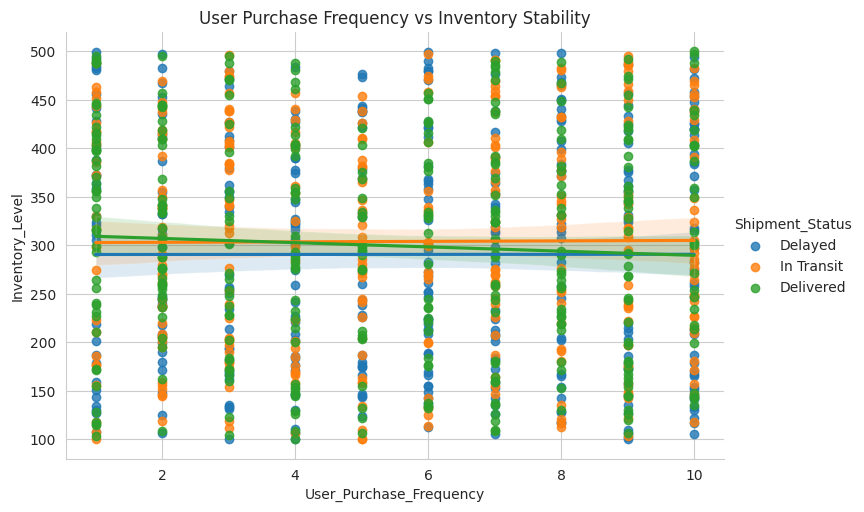

In [ ]:
# User Behaviour Vs Inventory Stability
sns.lmplot(data=df, x='User_Purchase_Frequency',y='Inventory_Level',
           hue='Shipment_Status', aspect=1.5)
plt.title("User Purchase Frequency vs Inventory Stability")
plt.show()

**Anomalies Detection**

In [ ]:
# Z-Score Based Anomaly Detection
from scipy.stats import zscore

df['Inventory_Z'] = zscore(df['Inventory_Level'])
df['Z_Anomaly'] = df['Inventory_Z'].abs() > 1.5 # Threshold

print(df[df['Z_Anomaly']][['Timestamp', 'Asset_ID', 'Inventory_Level', 'Inventory_Z']])

              Timestamp Asset_ID  Inventory_Level  Inventory_Z
1   2024-10-30 07:53:51  Truck_6              491     1.701220
4   2024-09-27 15:52:58  Truck_7              480     1.604302
5   2024-09-17 06:02:15  Truck_7              118    -1.585182
6   2024-02-05 08:38:56  Truck_4              480     1.604302
24  2024-02-11 13:30:18  Truck_2              119    -1.576372
..                  ...      ...              ...          ...
970 2024-03-21 11:55:45  Truck_5              106    -1.690911
974 2024-08-09 16:48:19  Truck_5              106    -1.690911
980 2024-12-01 12:38:57  Truck_4              122    -1.549939
985 2024-03-09 09:56:32  Truck_4              475     1.560248
996 2024-04-30 04:58:58  Truck_5              479     1.595491

[130 rows x 4 columns]


In [ ]:
# Using Isolation Forest for Multivariate Anomalies
from sklearn.ensemble import IsolationForest

features = df[[
    'Inventory_Level', 'Asset_Utilization', 'Demand_Forecast',
    'User_Purchase_Frequency', 'Waiting_Time'
]].dropna()

isf = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
df.loc[features.index, 'IForest_Anomaly'] = isf.fit_predict(features)  # -1 = anomaly

anomalies = df[df['IForest_Anomaly'] == -1]
print(anomalies[['Timestamp', 'Asset_ID', 'Inventory_Level']])

              Timestamp  Asset_ID  Inventory_Level
92  2024-04-30 12:39:49   Truck_1              106
116 2024-01-18 08:34:25   Truck_2              491
119 2024-06-11 08:04:09   Truck_4              118
146 2024-01-28 04:43:23   Truck_1              317
159 2024-05-09 18:49:33  Truck_10              100
216 2024-04-15 18:58:09   Truck_7              170
255 2024-08-02 06:58:21   Truck_8              133
270 2024-04-22 10:55:19   Truck_9              152
295 2024-11-01 21:31:14   Truck_2              103
378 2024-11-28 00:36:34  Truck_10              493
386 2024-07-13 15:41:00  Truck_10              133
417 2024-09-12 00:06:39   Truck_3              370
493 2024-03-01 14:48:13   Truck_9              127
500 2024-11-13 11:31:44   Truck_4              492
519 2024-11-23 10:56:55   Truck_4              100
545 2024-12-02 10:19:46   Truck_4              106
639 2024-01-31 00:01:35   Truck_1              469
669 2024-04-27 15:33:04   Truck_8              497
875 2024-09-29 14:00:13   Truck

In [ ]:
# Rolling window Volatility Anomaly Detection
df['Rolling_Mean'] = df['Inventory_Level'].rolling(window=10).mean()
df['Rolling_Std'] = df['Inventory_Level'].rolling(window=10).std()

df['Rolling_Anomaly'] = abs(df['Inventory_Level'] - df['Rolling_Mean']) > 2 * df['Rolling_Std']

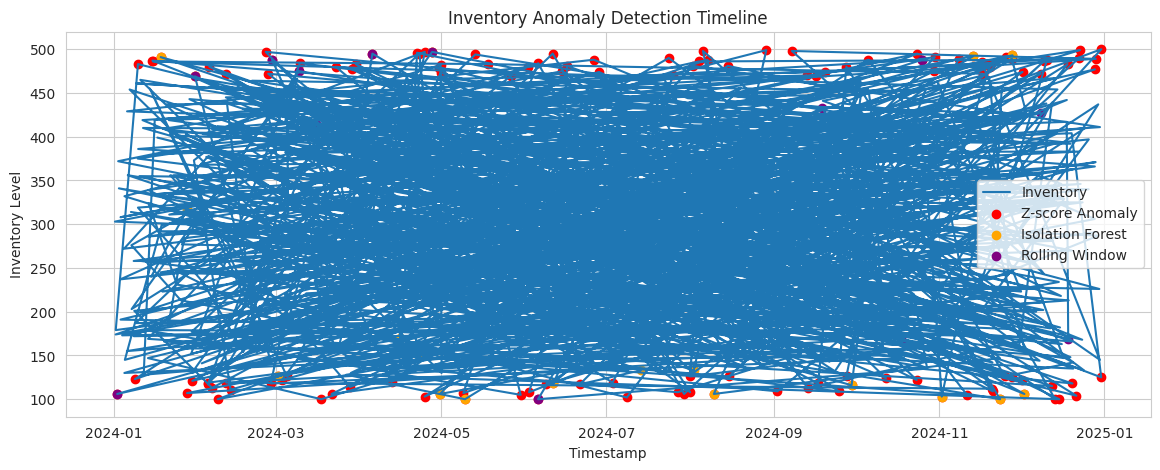

In [ ]:
# Visualize Anomalies Over Time
plt.figure(figsize=(14, 5))
plt.plot(df['Timestamp'], df['Inventory_Level'], label='Inventory')
plt.scatter(df[df['Z_Anomaly']]['Timestamp'], df[df['Z_Anomaly']]['Inventory_Level'],
            color='red', label='Z-score Anomaly')
plt.scatter(df[df['IForest_Anomaly'] == -1]['Timestamp'],
            df[df['IForest_Anomaly'] == -1]['Inventory_Level'],
            color='orange', label='Isolation Forest')
plt.scatter(df[df['Rolling_Anomaly']]['Timestamp'],
            df[df['Rolling_Anomaly']]['Inventory_Level'],
            color='purple', label='Rolling Window')

plt.legend()
plt.title("Inventory Anomaly Detection Timeline")
plt.xlabel("Timestamp")
plt.ylabel("Inventory Level")
plt.grid(True)
plt.show()


# **WARE HOUSING**

In [ ]:
print(df['Traffic_Status'].dtype)

int64


In [ ]:
# Show basic stats for warehouse-related fields
warehouse_cols = [
    'Asset_Utilization', 'Logistics_Delay', 'Waiting_Time',
    'Traffic_Status', 'Temperature', 'Humidity',
    'Logistics_Delay_Reason'
]
print("\n Warehouse KPIs Summary:\n", df[warehouse_cols].describe(include='all'))

# Unique values for delay reasons
print("\nUnique Logistics Delay Reasons:\n", df['Logistics_Delay_Reason'].value_counts(dropna=False))


 Warehouse KPIs Summary:
         Asset_Utilization  Logistics_Delay  Waiting_Time  Traffic_Status  \
count         1000.000000      1000.000000   1000.000000     1000.000000   
unique                NaN              NaN           NaN             NaN   
top                   NaN              NaN           NaN             NaN   
freq                  NaN              NaN           NaN             NaN   
mean            79.599100         0.566000     35.062000        2.001000   
std             11.631153         0.495873     14.477768        0.809725   
min             60.000000         0.000000     10.000000        1.000000   
25%             69.475000         0.000000     23.000000        1.000000   
50%             79.250000         1.000000     35.000000        2.000000   
75%             89.425000         1.000000     49.000000        3.000000   
max            100.000000         1.000000     60.000000        3.000000   

        Temperature     Humidity Logistics_Delay_Reason  
co

In [ ]:
df['Capacity_Pressure'] = (
    df[['Traffic_Status', 'Waiting_Time', 'Asset_Utilization']].sum(axis=1)
)
df['Capacity_Pressure'] = (
    (df['Capacity_Pressure'] - df['Capacity_Pressure'].min()) /
    (df['Capacity_Pressure'].max() - df['Capacity_Pressure'].min() + 1e-5)
)

In [ ]:
# Average and Peaks
print("\nWarehouse Utilization Statistics:\n")
print(df[['Asset_Utilization','Traffic_Status', 'Waiting_Time','Capacity_Pressure']].describe())


Warehouse Utilization Statistics:

       Asset_Utilization  Traffic_Status  Waiting_Time  Capacity_Pressure
count        1000.000000     1000.000000   1000.000000        1000.000000
mean           79.599100        2.001000     35.062000           0.488043
std            11.631153        0.809725     14.477768           0.216098
min            60.000000        1.000000     10.000000           0.000000
25%            69.475000        1.000000     23.000000           0.331509
50%            79.250000        2.000000     35.000000           0.487903
75%            89.425000        3.000000     49.000000           0.646601
max           100.000000        3.000000     60.000000           1.000000


In [ ]:
# Time based Analysis
df_daily = df.groupby(df['Timestamp'].dt.date).agg({
    'Asset_Utilization': 'mean',
    'Traffic_Status' : 'mean',
    'Waiting_Time' : 'mean',
    'Capacity_Pressure' : 'mean',
    'Logistics_Delay' : 'sum'
}).reset_index()
df_daily.rename(columns={'Timestamp': 'Date'}, inplace=True)

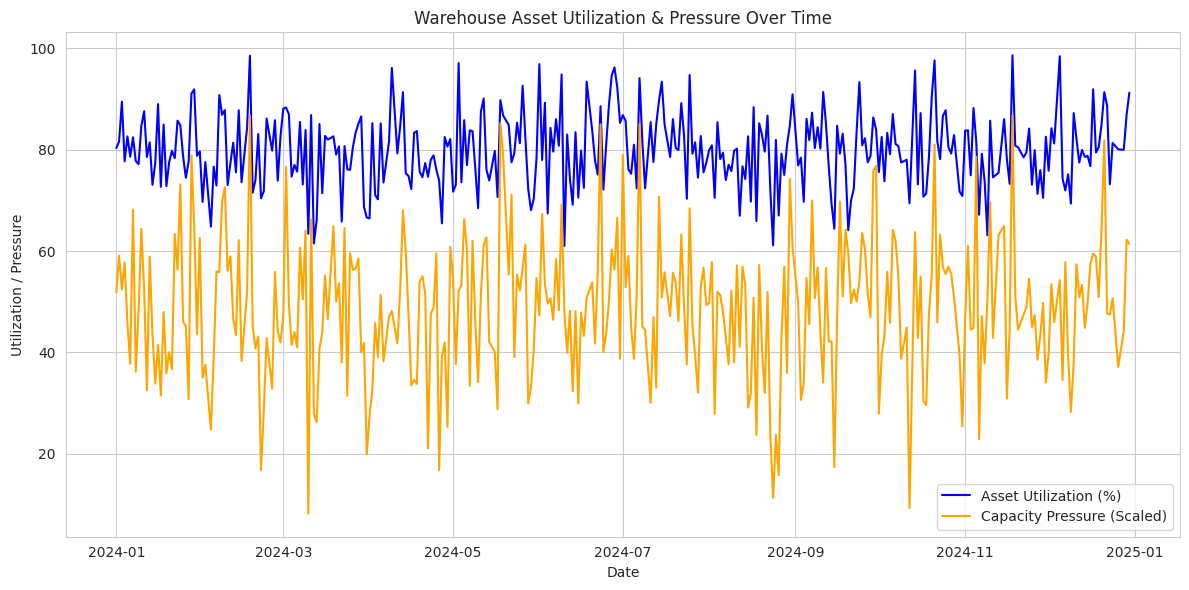

In [ ]:
# Utilization over time
plt.figure()
plt.plot(df_daily['Date'], df_daily['Asset_Utilization'], label='Asset Utilization (%)',color='blue')
plt.plot(df_daily['Date'], df_daily['Capacity_Pressure']*100, label='Capacity Pressure (Scaled)', color='orange')
plt.title("Warehouse Asset Utilization & Pressure Over Time")
plt.xlabel("Date")
plt.ylabel("Utilization / Pressure")
plt.legend()
plt.tight_layout()
plt.show()

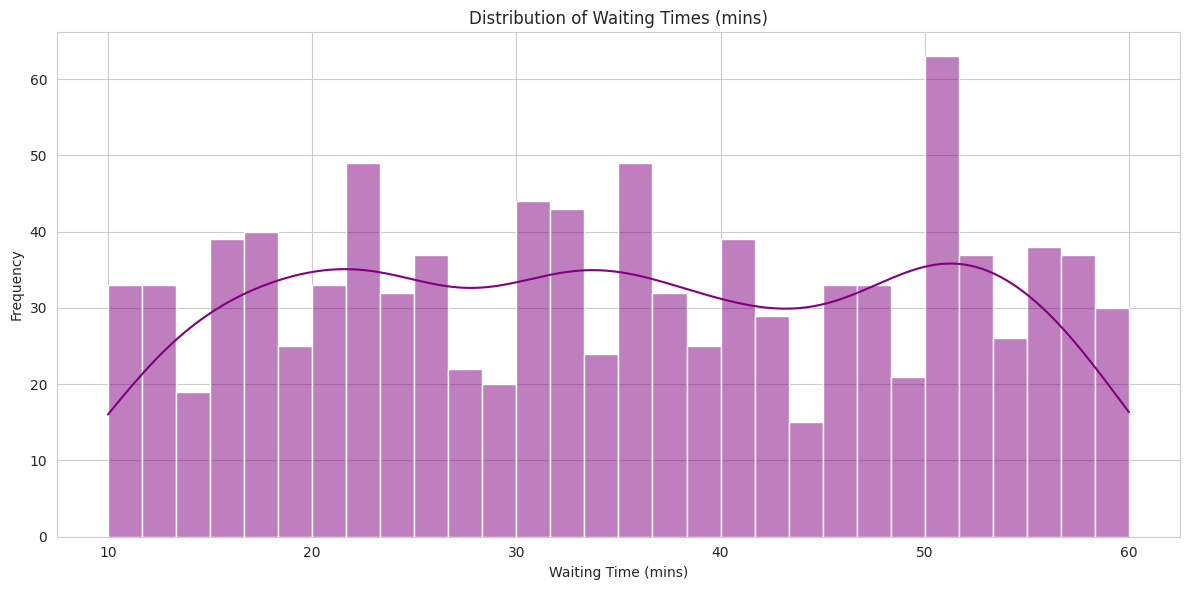

In [ ]:
# Distribution of Waiting Times
plt.figure()
sns.histplot(df['Waiting_Time'], bins=30, color='purple', kde = True)
plt.title("Distribution of Waiting Times (mins)")
plt.xlabel("Waiting Time (mins)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

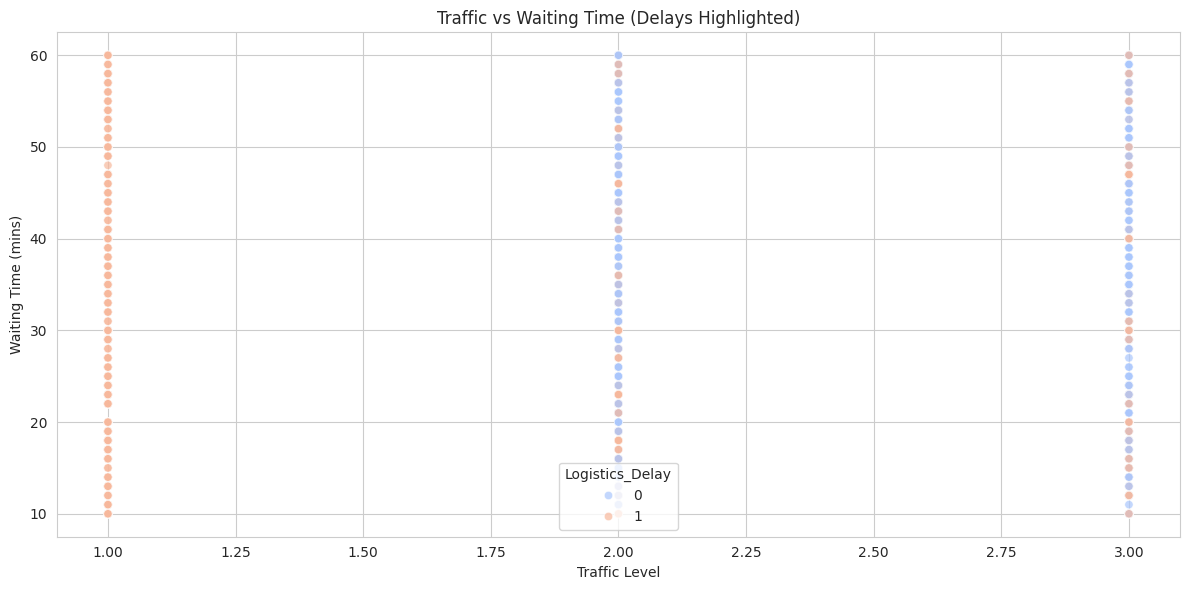

In [ ]:
# Scatter: Traffic vs Waiting Time (color by delay)
plt.figure()
sns.scatterplot(
    x='Traffic_Status', y='Waiting_Time', hue='Logistics_Delay',
    data=df, palette='coolwarm', alpha=0.7
)
plt.title("Traffic vs Waiting Time (Delays Highlighted)")
plt.xlabel("Traffic Level")
plt.ylabel("Waiting Time (mins)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3669029456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_counts.values, y=delay_counts.index, palette='viridis')


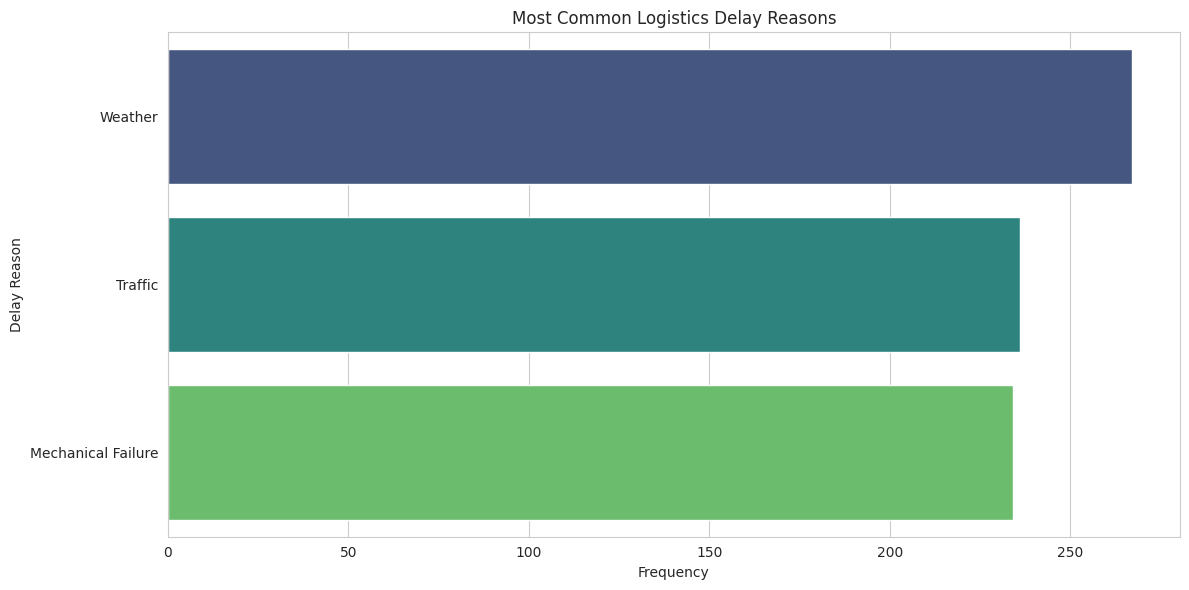

In [ ]:
# Bar Plot : Delay Reasons
if 'Logistics_Delay_Reason' in df.columns:
    plt.figure()
    delay_counts = df['Logistics_Delay_Reason'].value_counts()
    sns.barplot(x=delay_counts.values, y=delay_counts.index, palette='viridis')
    plt.title("Most Common Logistics Delay Reasons")
    plt.xlabel("Frequency")
    plt.ylabel("Delay Reason")
    plt.tight_layout()
    plt.show()

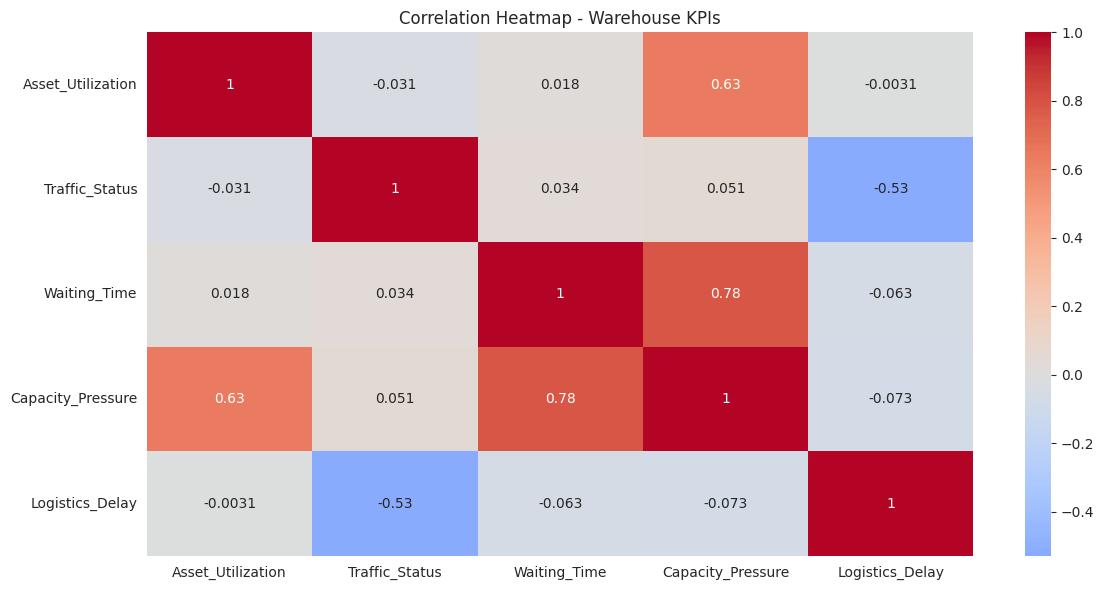

In [ ]:
# Correlation Heatmap for warehouse variables
plt.figure()
sns.heatmap(df[['Asset_Utilization', 'Traffic_Status', 'Waiting_Time', 'Capacity_Pressure', 'Logistics_Delay']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap - Warehouse KPIs")
plt.tight_layout()
plt.show()

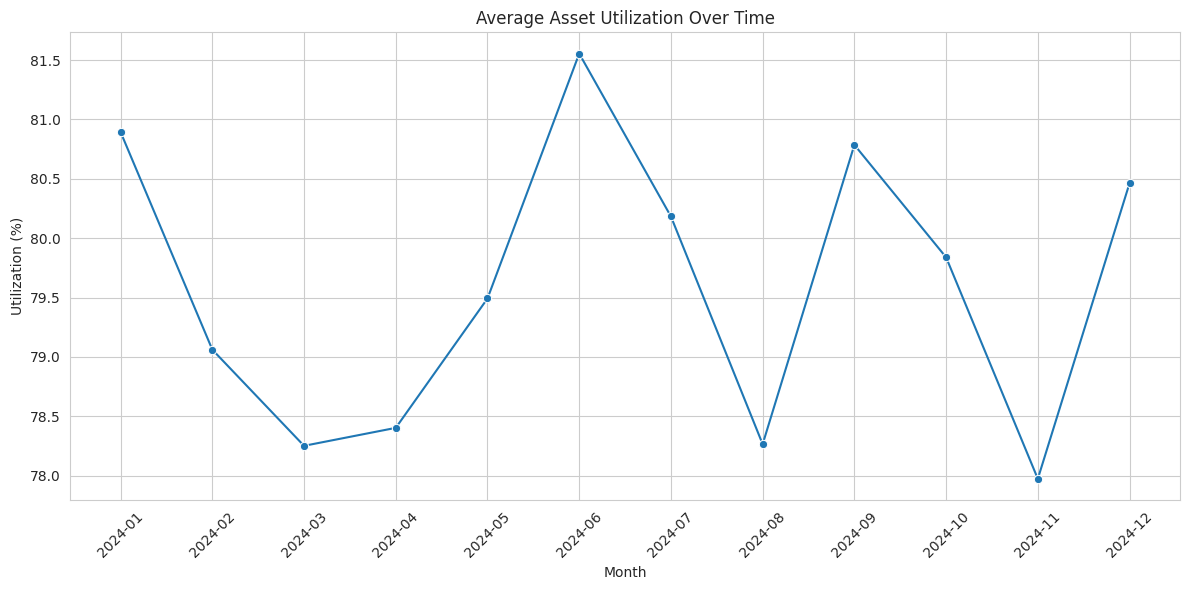

In [ ]:
# Asset Utilization Trends Over Time
# Group by month
df['Month'] = df['Timestamp'].dt.to_period('M').astype(str)

asset_util_monthly = df.groupby('Month')['Asset_Utilization'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=asset_util_monthly, x='Month', y='Asset_Utilization', marker='o')
plt.xticks(rotation=45)
plt.title('Average Asset Utilization Over Time')
plt.ylabel('Utilization (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

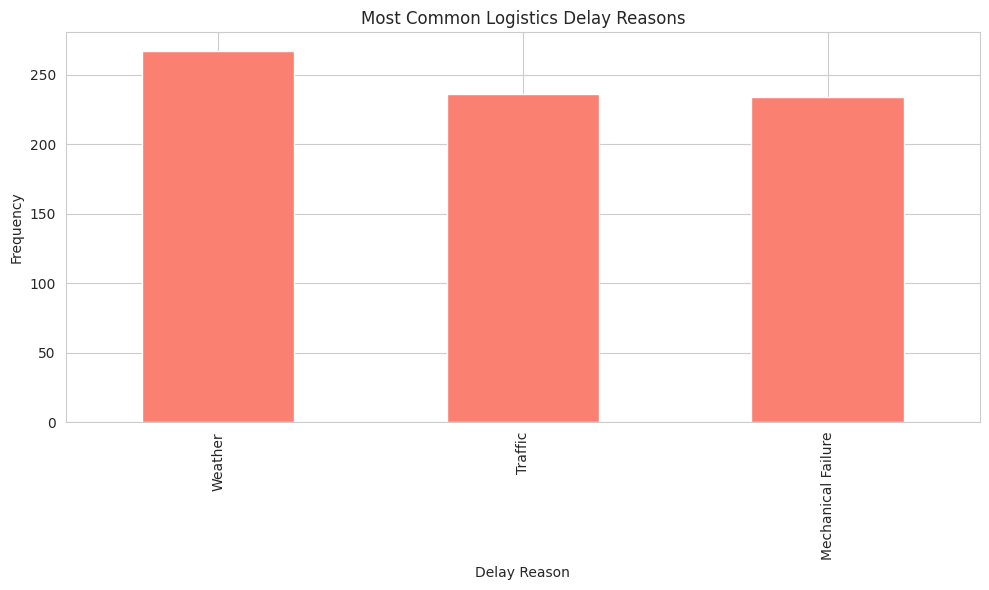

In [ ]:
# Logistics Delay Reason Frequency
plt.figure(figsize=(10,6))
df['Logistics_Delay_Reason'].value_counts().plot(kind='bar',color='salmon')
plt.title("Most Common Logistics Delay Reasons")
plt.xlabel("Delay Reason")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

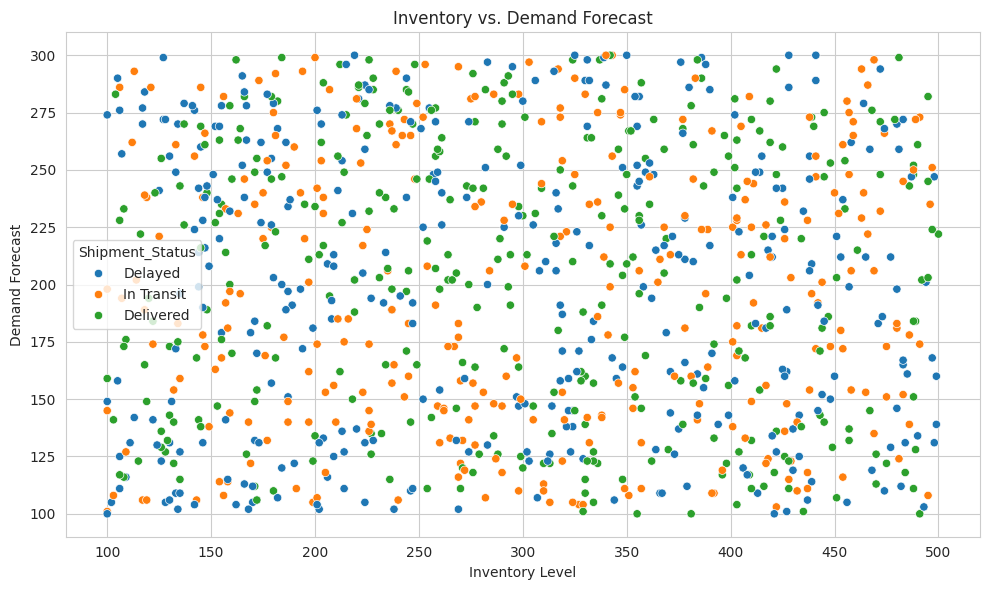

Correlation between Inventory Level and Demand Forecast: -0.02


In [ ]:
# Inventory Level vs. Demand Forecast
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Inventory_Level', y='Demand_Forecast', hue='Shipment_Status')
plt.title("Inventory vs. Demand Forecast")
plt.xlabel('Inventory Level')
plt.ylabel('Demand Forecast')
plt.grid(True)
plt.tight_layout()
plt.show()


# Correlation Value
cor_value = df['Inventory_Level'].corr(df['Demand_Forecast'])
print(f"Correlation between Inventory Level and Demand Forecast: {cor_value:.2f}")

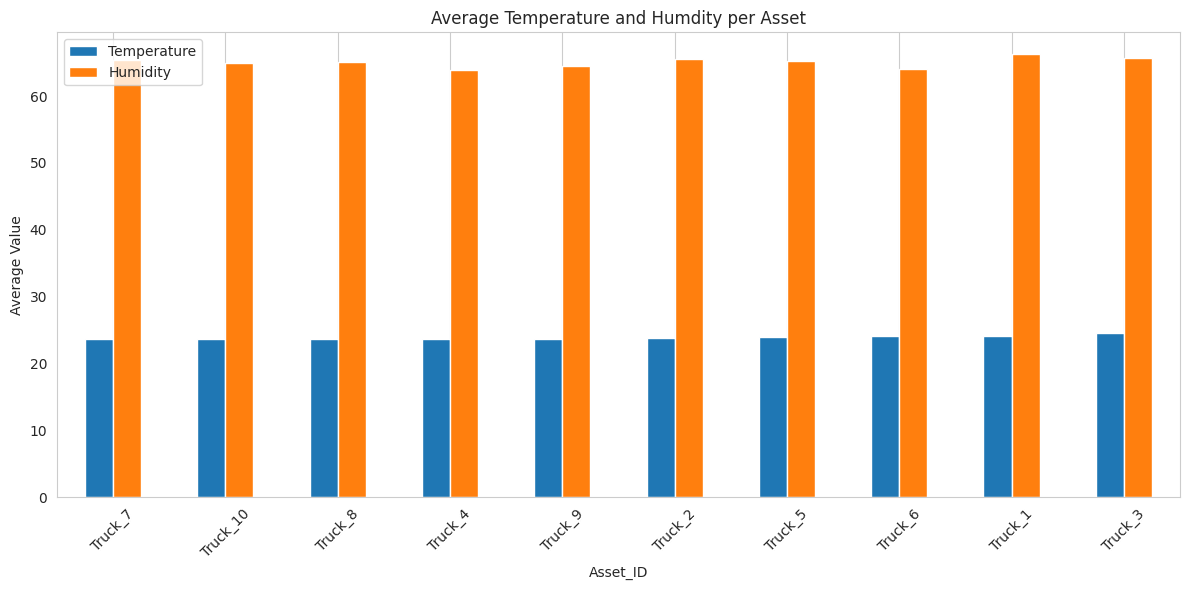

In [ ]:
# Environmental Conditions by Location
# Average temp & humidty per asset/location
env_stats = df.groupby('Asset_ID')[['Temperature', 'Humidity']].mean().sort_values(by='Temperature')


env_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Average Temperature and Humdity per Asset')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Empty DataFrame
Columns: [Timestamp, Asset_ID, Asset_Utilization, Util_Z]
Index: []


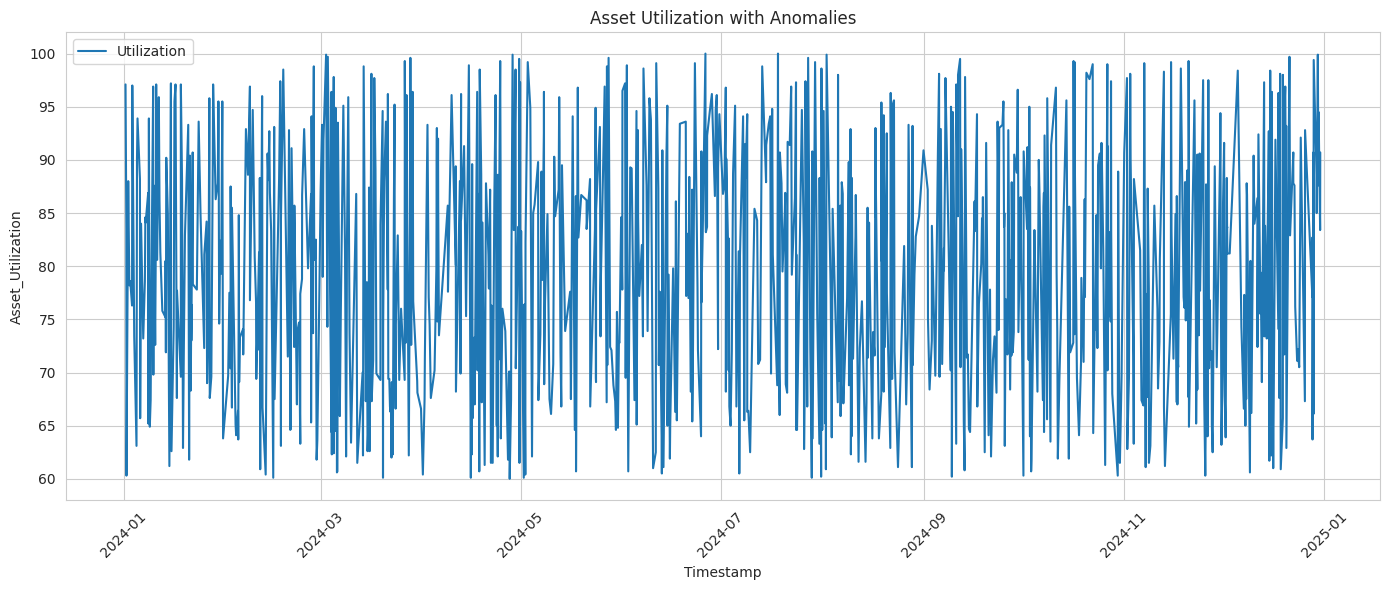

In [ ]:
# Anomaly Detection on Asset Utilization
from scipy.stats import zscore

df['Util_Z'] = zscore(df['Asset_Utilization'])
df['Util_Anomaly'] = df['Util_Z'].abs() > 3

#Display anomalies
util_anomalies = df[df['Util_Anomaly']][['Timestamp','Asset_ID','Asset_Utilization','Util_Z']]
print(util_anomalies.head())

#Plotting
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Timestamp', y='Asset_Utilization',label='Utilization')
sns.scatterplot(data=util_anomalies, x='Timestamp', y='Asset_Utilization', color='red',label='Anomaly')
plt.title("Asset Utilization with Anomalies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

             Timestamp  Asset_ID  Waiting_Time    Wait_Z
11 2024-02-02 22:28:16  Truck_10            13 -1.524616
16 2024-10-30 17:52:03   Truck_4            58  1.585153
22 2024-01-07 09:13:28   Truck_6            57  1.516047
40 2024-12-28 11:40:55   Truck_2            12 -1.593722
54 2024-07-11 07:07:27   Truck_8            12 -1.593722


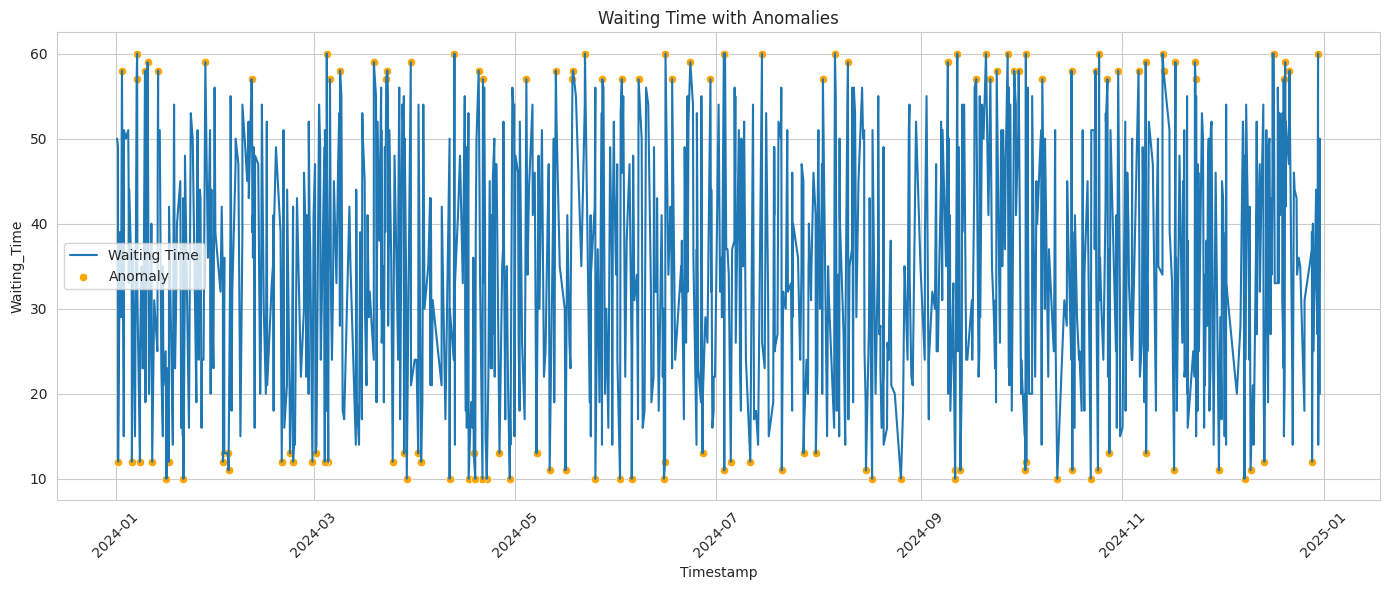

In [ ]:
# Waiting Time Anomaly Detection
df['Wait_Z'] = zscore(df['Waiting_Time'])
df['Wait_Anomaly'] = df['Wait_Z'].abs() > 1.5

# show anomalies
wait_anomalies = df[df['Wait_Anomaly']][['Timestamp','Asset_ID','Waiting_Time','Wait_Z']]
print(wait_anomalies.head())

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Timestamp', y='Waiting_Time', label='Waiting Time')
sns.scatterplot(data=wait_anomalies, x='Timestamp', y='Waiting_Time',color='orange',label='Anomaly')
plt.title('Waiting Time with Anomalies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

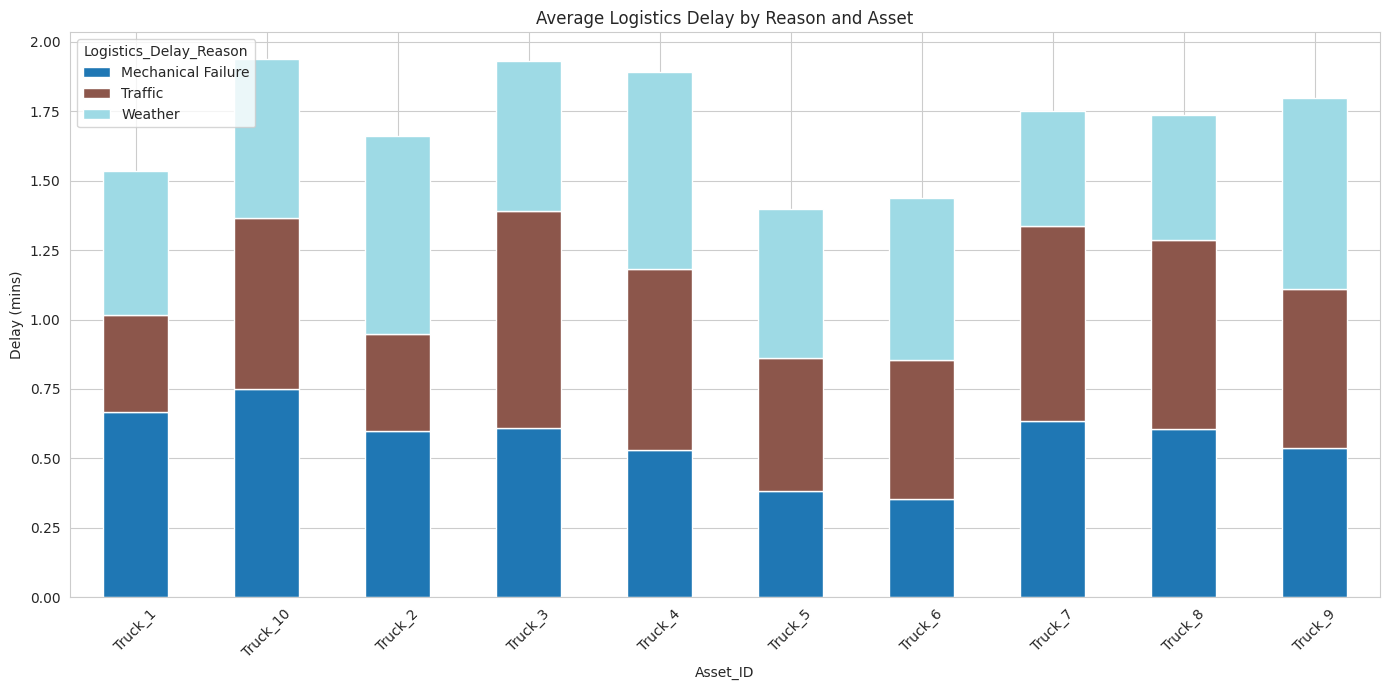

In [ ]:
# Logistic Delay Pattern Analysis
# Check average delay per asset or reason
delay_pattern = df.groupby(['Asset_ID', 'Logistics_Delay_Reason'])['Logistics_Delay'].mean().unstack().fillna(0)

delay_pattern.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
plt.title('Average Logistics Delay by Reason and Asset')
plt.ylabel('Delay (mins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()